### Feature Description
<table>
<tr><th>Feature Name</th><th>Definition</th><th>Key</th></tr>
<tr><td>survival</td><td> Survival </td><td>0 = No, 1 = Yes</td></tr>
<tr><td>pclass</td> <td>Ticket class</td><td>1 = 1st, 2 = 2nd, 3 = 3rd</td></tr>
<tr><td>name </td><td>Passenger Name	</td></tr>
<tr><td>sex </td><td>Sex 	</td></tr>
<tr><td>Age </td><td>Age in years 	</td></tr>
<tr><td>sibsp </td><td>Number of siblings / spouses aboard the Titanic</td></tr>
<tr><td>parch </td><td>Number of parents / children aboard the Titanic</td></tr>
<tr><td>ticket </td><td>Ticket number</td></tr>
<tr><td>fare </td><td>Passenger fare </td></tr>
<tr><td>cabin </td><td>Cabin number </td></tr>
<tr><td>embarked </td><td>Port of Embarkation</td><td> C = Cherbourg, Q = Queenstown, S = Southampton</td></tr>

#### Titanic dataset Survival Classification

1) Read the dataset<br>
2) Remove/handle null values<br>
3) Depict Survived column count on a countplot<br>
4) Depict Survived column count based on Sex on a countplot<br>
5) Depict Survived column count based on Pclass on a countplot<br>
6) Depict quartile distribution of Age column for each of Pclass categories<br>
7) Encode categorical varibles if any<br>
8) Select appropriate features and generate independent variables keeping 'Survived' column as dependent variable<br>
9) Split the dataset into training and testing data with test_size=25%<br>
10) Apply Logistic Regression and generate the predicted values for the test data<br>
11) Compute training and testing accuracy<br>
12) Generate confusion matrix. Also represnet it on heatmap<br>
13) Generate classifictaion_report<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('D:\PYTHON ALL/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].fillna(df["Age"].mean(),inplace=True)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
E101           3
D              3
              ..
D30            1
B50            1
C103           1
B30            1
E31            1
Name: Cabin, Length: 147, dtype: int64

In [7]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [9]:
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

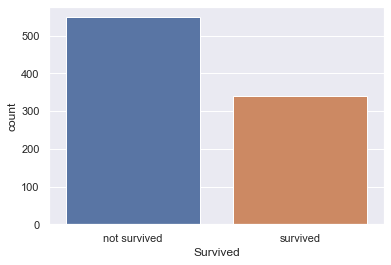

In [11]:
df['Survived'] = df['Survived'].replace({0:'not survived',1:'survived'})
sns.set_theme(style="darkgrid")
sns.countplot(df['Survived'])

plt.show

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

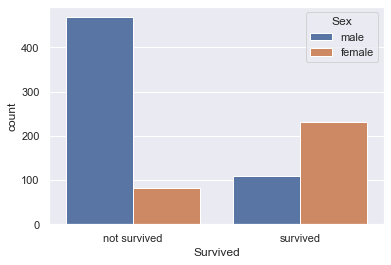

In [12]:
sns.countplot(df['Survived'],hue=df['Sex'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

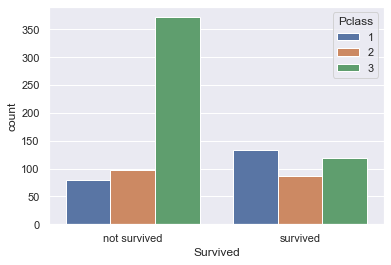

In [13]:
sns.countplot(df['Survived'],hue=df['Pclass'])

### QUARTILE DISTRIBUTION <br>

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


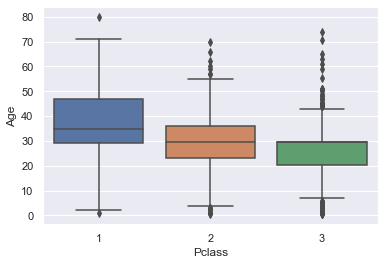

In [14]:
sns.boxplot(df['Pclass'],df['Age'])
plt.show()

### Categorical variable <br>

In [15]:
df['Survived'] = df['Survived'].replace({'not survived':0,'survived':1})
df['Sex'] = df['Sex'].replace({'female':0,'male':1})
df['Embarked'] = df['Embarked'].replace({'S':1,'C':2,'Q':3})

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2


             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005028 -0.035330  0.043136  0.030300 -0.057686   
Survived       -0.005028  1.000000 -0.335549 -0.541585 -0.074673 -0.034040   
Pclass         -0.035330 -0.335549  1.000000  0.127741 -0.327954  0.081656   
Sex             0.043136 -0.541585  0.127741  1.000000  0.089434 -0.116348   
Age             0.030300 -0.074673 -0.327954  0.089434  1.000000 -0.231875   
SibSp          -0.057686 -0.034040  0.081656 -0.116348 -0.231875  1.000000   
Parch          -0.001657  0.083151  0.016824 -0.247508 -0.178232  0.414542   
Fare            0.012703  0.255290 -0.548193 -0.179958  0.088604  0.160887   
Embarked       -0.030555  0.108669  0.043835 -0.118593  0.009499 -0.060606   

                Parch      Fare  Embarked  
PassengerId -0.001657  0.012703 -0.030555  
Survived     0.083151  0.255290  0.108669  
Pclass       0.016824 -0.548193  0.043835  
Sex         -0.247508 -0.179958 -0.118593  

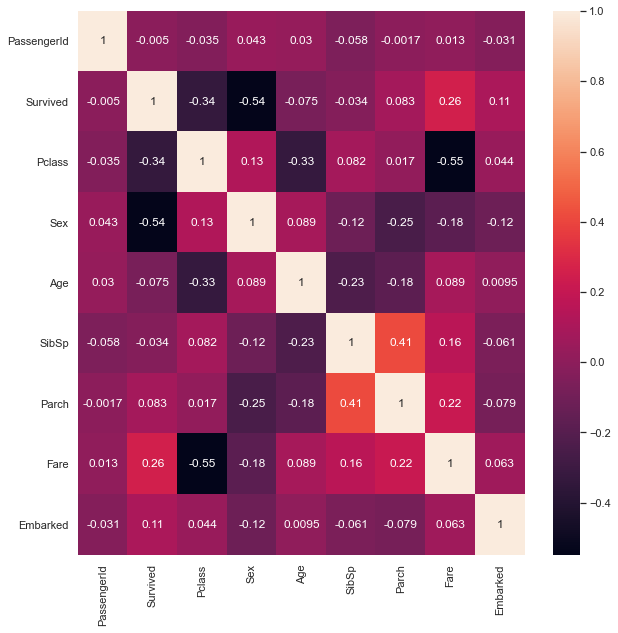

In [27]:
print(df.corr())
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### appropriate features and generate independent variables keeping 'Survived' column as dependent variable <br>

In [18]:
df1=df.copy()

In [19]:
df1 =  df1.iloc[:,[2,4,5,6,7,9,10,1]]

In [20]:
df1.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.000000,1,0,7.2500,1,0
1,1,0,38.000000,1,0,71.2833,2,1
2,3,0,26.000000,0,0,7.9250,1,1
3,1,0,35.000000,1,0,53.1000,1,1
4,3,1,35.000000,0,0,8.0500,1,0
5,3,1,29.699118,0,0,8.4583,3,0
6,1,1,54.000000,0,0,51.8625,1,0
7,3,1,2.000000,3,1,21.0750,1,0
8,3,0,27.000000,0,2,11.1333,1,1
9,2,0,14.000000,1,0,30.0708,2,1


In [40]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [41]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,1
1,1,0,38.000000,1,0,71.2833,2
2,3,0,26.000000,0,0,7.9250,1
3,1,0,35.000000,1,0,53.1000,1
4,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,1
887,1,0,19.000000,0,0,30.0000,1
888,3,0,29.699118,1,2,23.4500,1
889,1,1,26.000000,0,0,30.0000,2


In [42]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [47]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
779,1,0,43.000000,0,1,211.3375,1
559,3,0,36.000000,1,0,17.4000,1
228,2,1,18.000000,0,0,13.0000,1
568,3,1,29.699118,0,0,7.2292,2
313,3,1,28.000000,0,0,7.8958,1
...,...,...,...,...,...,...,...
594,2,1,37.000000,1,0,26.0000,1
574,3,1,16.000000,0,0,8.0500,1
563,3,1,29.699118,0,0,8.0500,1
851,3,1,74.000000,0,0,7.7750,1


In [48]:
y_test

181    0
231    0
836    0
689    1
520    1
      ..
69     0
790    0
833    0
804    1
363    0
Name: Survived, Length: 223, dtype: int64

In [51]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr=LogisticRegression()

In [55]:
lr.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred = lr.predict(x_test)

In [57]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

#### Compute training and testing accuracy <br>

In [59]:
print('training score of model', lr.score(x_train,y_train))
print('testing score of model', lr.score(x_test,y_test))

training score of model 0.7957957957957958
testing score of model 0.820627802690583


### Generate confusion matrix. Also represnet it on heatmap <br>

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [74]:
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [75]:
cm

array([[121,  18],
       [ 22,  62]], dtype=int64)

In [77]:
print('accuracy score of the model : ',acc*100)

accuracy score of the model :  82.0627802690583


<AxesSubplot:>

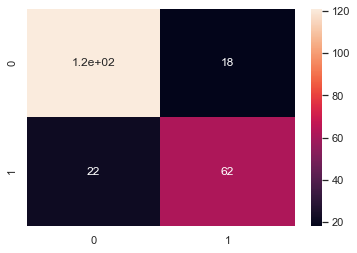

In [86]:
sns.heatmap(cm,annot=True)

In [87]:
print('classification report :')
print(cr)

classification report :
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       139
           1       0.78      0.74      0.76        84

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223

